In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import sys
import glob

sys.path.append('..')
from src.data.loader import MotionDataLoader

In [15]:
# Load motion capture data
data_dir = "../data"
loader = MotionDataLoader(data_dir)
files = loader.get_file_list()
print(f"Found {len(files)} data files:")
for file in files:
    print(f"  - {file}")

2025-04-06 02:51:22,967 - src.data.loader - INFO - Found 6 data files in ../data


Found 6 data files:
  - mariel_penelope.npy
  - mariel_honey.npy
  - mariel_beyond.npy
  - mariel_betternot_and_retrograde.npy
  - mariel_knownbetter.npy
  - mariel_chunli.npy


In [16]:
# Load and inspect a sample file
if files:
    sample_file = files[0]
    print(f"\nLoading sample file: {sample_file}")
    
    motion_data = loader.load_file(sample_file)
    
    file_info = loader.get_data_info(sample_file)
    
    print(f"Data shape: {motion_data.shape}")
    print(f"Number of joints: {file_info['n_joints']}")
    print(f"Number of frames: {file_info['n_frames']}")
    print(f"Min value: {file_info['min_value']:.4f}")
    print(f"Max value: {file_info['max_value']:.4f}")
    print(f"Mean value: {file_info['mean_value']:.4f}")
    print(f"Std value: {file_info['std_value']:.4f}")
else:
    print("No data files found!")

2025-04-06 02:51:22,996 - src.data.loader - INFO - Successfully loaded mariel_penelope.npy, shape: (55, 7757, 3)
2025-04-06 02:51:23,006 - src.data.loader - INFO - Data normalized
2025-04-06 02:51:23,007 - src.data.loader - INFO - Using cached data for mariel_penelope.npy



Loading sample file: mariel_penelope.npy
Data shape: (55, 7757, 3)
Number of joints: 55
Number of frames: 7757
Min value: -0.9212
Max value: 1.0000
Mean value: -0.0000
Std value: 0.2701


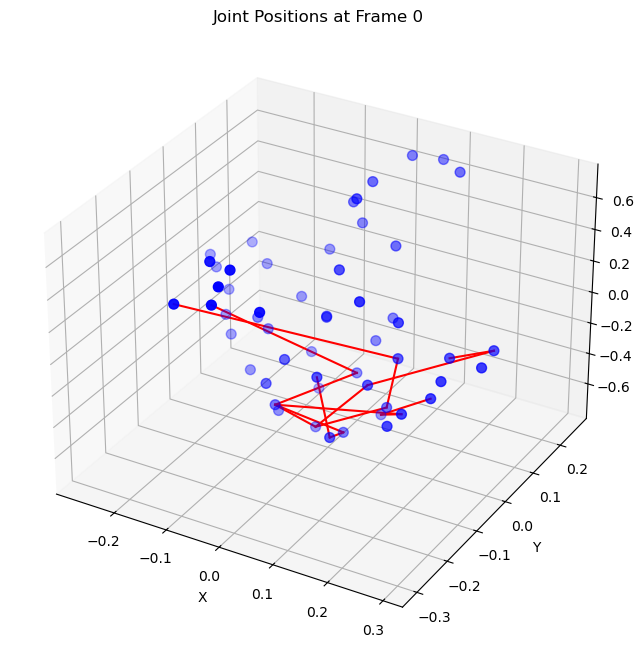

In [17]:
# Visualize a single frame as a 3D point cloud
if 'motion_data' in locals():
    frame_idx = 0
    positions = motion_data[:, frame_idx, :]
    
    # Create 3D plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s=50, c='blue', marker='o')
    connections = [
        (0, 1), (1, 2), (2, 3),  # Spine to head
        (1, 4), (4, 5), (5, 6),  # Right arm
        (1, 7), (7, 8), (8, 9),  # Left arm
        (0, 10), (10, 11), (11, 12),  # Right leg
        (0, 13), (13, 14), (14, 15)   # Left leg
    ]
    # Connect joints with lines
    for joint1, joint2 in connections:
        if joint1 < len(positions) and joint2 < len(positions):  
            ax.plot([positions[joint1, 0], positions[joint2, 0]],
                    [positions[joint1, 1], positions[joint2, 1]],
                    [positions[joint1, 2], positions[joint2, 2]], 'r-')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    ax.set_title(f'Joint Positions at Frame {frame_idx}')
    plt.show()

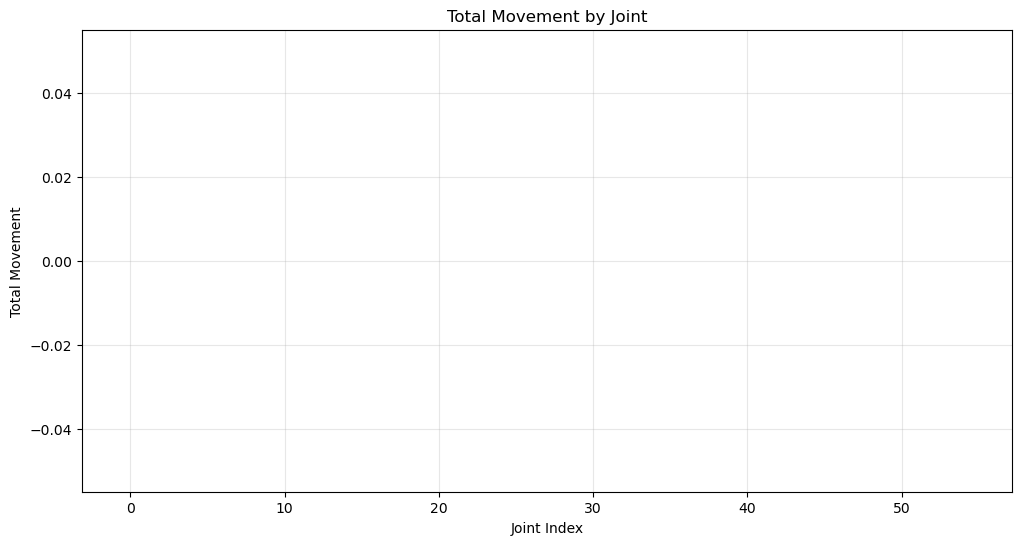

Most active joint: 0 (Total movement: 0.0000)
Least active joint: 0 (Total movement: 0.0000)


In [18]:
# Analyze joint movement over time
if 'motion_data' in locals():
    start_frame = 0
    end_frame = min(100, motion_data.shape[1]) 
    joint_movement = np.zeros((motion_data.shape[0], end_frame - start_frame - 1))
    
    for i in range(motion_data.shape[0]):  
        for t in range(start_frame, end_frame - 1):
            displacement = motion_data[i, t+1, :] - motion_data[i, t, :]
            
            movement = np.sqrt(np.sum(displacement**2))
            joint_movement[i, t-start_frame] = movement
    
    total_movement = np.sum(joint_movement, axis=1)
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(motion_data.shape[0]), total_movement)
    plt.xlabel('Joint Index')
    plt.ylabel('Total Movement')
    plt.title('Total Movement by Joint')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    most_active = np.argmax(total_movement)
    least_active = np.argmin(total_movement)
    print(f"Most active joint: {most_active} (Total movement: {total_movement[most_active]:.4f})")
    print(f"Least active joint: {least_active} (Total movement: {total_movement[least_active]:.4f})")

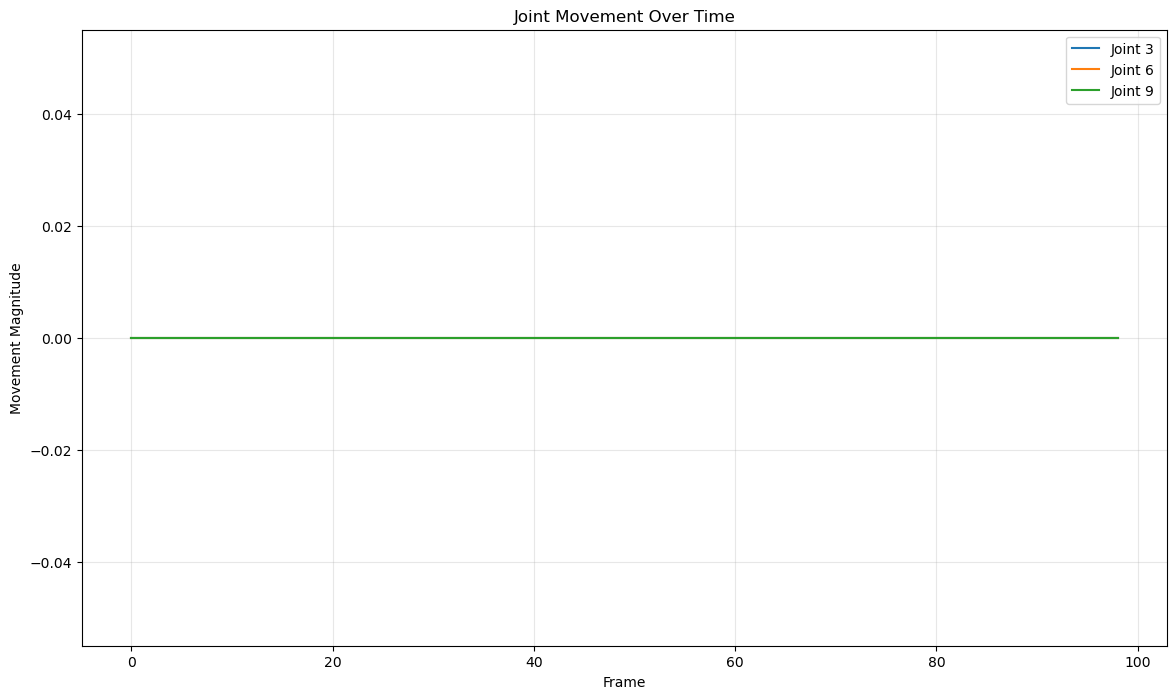

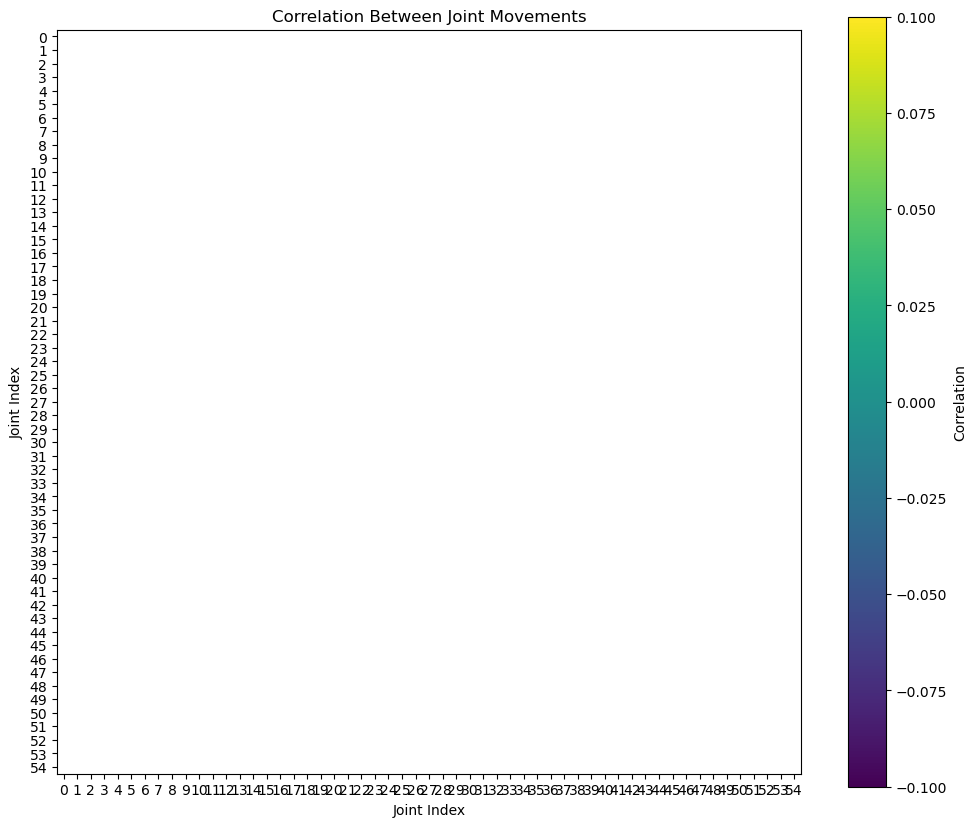


Highly correlated joint pairs (correlation > 0.8):


In [19]:
# Cell 7: Analyze temporal patterns
if 'motion_data' in locals() and 'joint_movement' in locals():
    selected_joints = [3, 6, 9]  
  
    plt.figure(figsize=(14, 8))
    
    for joint in selected_joints:
        if joint < joint_movement.shape[0]:
            plt.plot(joint_movement[joint], label=f'Joint {joint}')
    
    plt.xlabel('Frame')
    plt.ylabel('Movement Magnitude')
    plt.title('Joint Movement Over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    plt.figure(figsize=(12, 10))
    
    corr_matrix = np.corrcoef(joint_movement)
    plt.imshow(corr_matrix, cmap='viridis')
    plt.colorbar(label='Correlation')
    plt.title('Correlation Between Joint Movements')
    plt.xlabel('Joint Index')
    plt.ylabel('Joint Index')
    
    plt.grid(False)
    plt.xticks(range(motion_data.shape[0]))
    plt.yticks(range(motion_data.shape[0]))
    
    plt.show()
    high_corr_threshold = 0.8
    
    print("\nHighly correlated joint pairs (correlation > {:.1f}):".format(high_corr_threshold))
    for i in range(corr_matrix.shape[0]):
        for j in range(i+1, corr_matrix.shape[1]):
            if corr_matrix[i, j] > high_corr_threshold:
                print(f"  Joint {i} and Joint {j}: correlation = {corr_matrix[i, j]:.3f}")


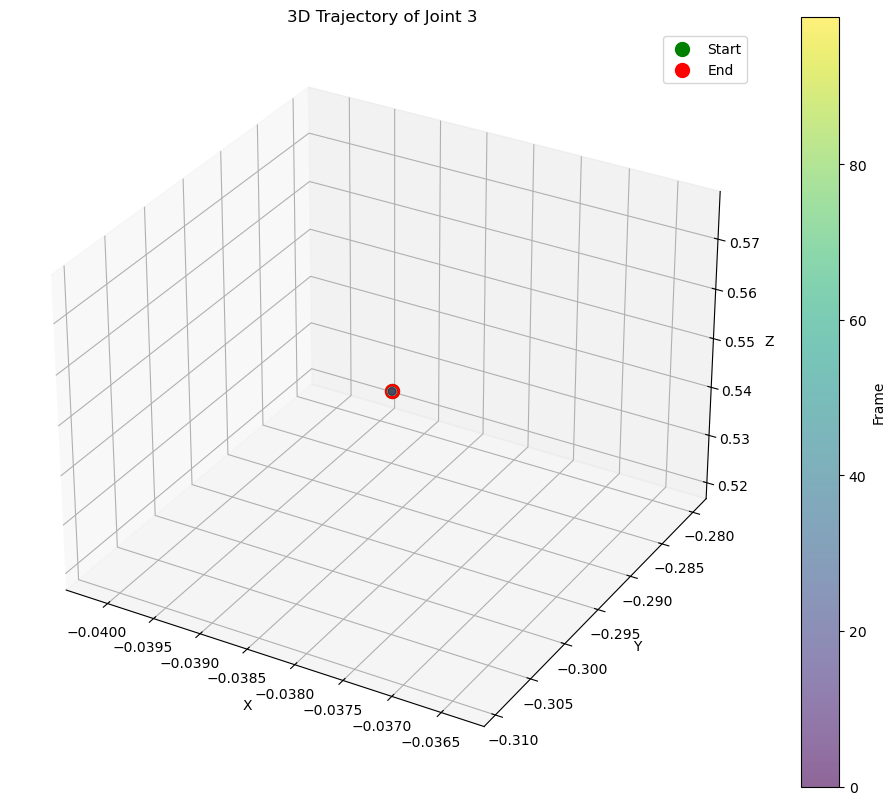

Statistics for Joint 3 trajectory:
  Total distance traveled: 0.0000
  Average speed: 0.0000 units per frame
  Maximum displacement: 0.0000 at frame 0


In [20]:
# Cell 8: Analyze 3D trajectories
if 'motion_data' in locals():
    # Select a specific joint to visualize trajectory
    joint_idx = 3  # Example: head joint (may need adjustment)
    
    if joint_idx < motion_data.shape[0]:
        # Get trajectory for the selected joint
        trajectory = motion_data[joint_idx, start_frame:end_frame, :]
        
        # Create 3D plot
        fig = plt.figure(figsize=(12, 10))
        ax = fig.add_subplot(111, projection='3d')
        
        # Plot the trajectory as a 3D line
        ax.plot(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 'b-', alpha=0.7, linewidth=2)
        
        # Add markers for start and end points
        ax.scatter(trajectory[0, 0], trajectory[0, 1], trajectory[0, 2], color='green', s=100, label='Start')
        ax.scatter(trajectory[-1, 0], trajectory[-1, 1], trajectory[-1, 2], color='red', s=100, label='End')
        
        # Add color gradient to show direction of movement
        points = ax.scatter(trajectory[:, 0], trajectory[:, 1], trajectory[:, 2], 
                          c=range(trajectory.shape[0]), cmap='viridis', 
                          s=30, alpha=0.6)
        plt.colorbar(points, ax=ax, label='Frame')
        # Set labels and title
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title(f'3D Trajectory of Joint {joint_idx}')
        
        # Add legend
        ax.legend()
        
        # Show the plot
        plt.show()
        
        # Calculate some statistics about the trajectory
        # Total distance traveled
        displacements = np.diff(trajectory, axis=0)
        distances = np.sqrt(np.sum(displacements**2, axis=1))
        total_distance = np.sum(distances)
        
        # Average speed (distance per frame)
        avg_speed = total_distance / (end_frame - start_frame - 1)
        
        # Maximum displacement between consecutive frames
        max_displacement = np.max(distances)
        max_displacement_frame = np.argmax(distances) + start_frame
        
        print(f"Statistics for Joint {joint_idx} trajectory:")
        print(f"  Total distance traveled: {total_distance:.4f}")
        print(f"  Average speed: {avg_speed:.4f} units per frame")
        print(f"  Maximum displacement: {max_displacement:.4f} at frame {max_displacement_frame}")

# Cell 9: Summary of findings
"""
## Summary of Motion Data Analysis

From our exploratory analysis, we've observed the following:

1. **Basic Data Structure**: We've loaded motion capture data with a shape representing joints, timesteps, and 3D coordinates.

2. **Joint Movement Analysis**: We've identified the most and least active joints during the dance sequence, providing insights into which body parts contribute most to the movement.

3. **Temporal Patterns**: We've visualized how movement intensity changes over time and identified patterns in the dance sequence.

4. **Correlation Analysis**: We've analyzed correlations between joint movements, which can help understand coordinated body movements.

5. **3D Trajectory Analysis**: We've examined the spatial pathway of selected joints, providing a better understanding of the dance movement in 3D space.

These insights will be valuable for the next steps of our project:
- Creating animated visualizations of the dance sequences
- Identifying meaningful segments for labeling
- Designing an appropriate contrastive learning model to connect dance movements with text descriptions

In the next notebook, we'll focus on creating interactive 3D visualizations of the dance sequences.
"""


In [21]:
# Cell 10: Create a helper function to extract and visualize subsequences
def extract_subsequence(motion_data, start_frame, length):
    """
    Extract a subsequence from the motion data
    
    Args:
        motion_data: Full motion capture data
        start_frame: Starting frame index
        length: Number of frames to extract
        
    Returns:
        Subsequence of the motion data
    """
    end_frame = min(start_frame + length, motion_data.shape[1])
    actual_length = end_frame - start_frame
    
    if actual_length < length:
        print(f"Warning: Requested length {length} exceeds available frames. Using {actual_length} frames instead.")
    
    return motion_data[:, start_frame:end_frame, :]
if 'motion_data' in locals():
    # Extract a sample subsequence
    seq_start = 0
    seq_length = 50  # target sequence length of 20-50 frames as mentioned in the prompt
    
    sample_sequence = extract_subsequence(motion_data, seq_start, seq_length)
    
    print(f"Extracted subsequence with shape: {sample_sequence.shape}")
    print(f"This represents {sample_sequence.shape[0]} joints over {sample_sequence.shape[1]} frames in 3D space.")
    
    # Save the sample sequence for use in the next notebook
    if not os.path.exists('../data/processed'):
        os.makedirs('../data/processed')
    
    np.save('../data/processed/sample_sequence.npy', sample_sequence)
    print("Sample sequence saved to '../data/processed/sample_sequence.npy'")


Extracted subsequence with shape: (55, 50, 3)
This represents 55 joints over 50 frames in 3D space.
Sample sequence saved to '../data/processed/sample_sequence.npy'
